In [2]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt

In [3]:
lower = pd.read_excel('02 AD+3CV+GS+DO_medium_down.xlsx', index_col=0).iloc[:25, :]
i_norma = pd.read_excel('AD+GS+3CV+DO_medium+IN.xlsx', index_col=0)

In [4]:
lower.head(3)

,loss,acc,val_loss,val_acc
0,3.596039,0.396685,2.627808,0.745301
1,27.346151,0.612714,29.248833,0.770729
2,114.021278,0.667468,88.799347,0.817161


In [5]:
i_norma.head(3)

,loss,acc,val_loss,val_acc
0,7.264599,0.158725,2.321735,0.494430
1,1.461462,0.640692,0.891036,0.805681
2,0.600379,0.857596,0.665968,0.860447


In [6]:
print(lower.shape)
print(i_norma.shape)

(25, 4)
(25, 4)


### Plot accuracies

#### Create a df to plot loss values

In [7]:
# Initialize an empty df
final_acc = pd.DataFrame()

In [8]:
# List the columns the df will have
final_acc_columns = ['Train Acc Lower', 'Train Acc IN', 'Val Acc Lower', 'Val Acc IN']

In [9]:
# Create the columns
for column in final_acc_columns:
    final_acc[column] = None

In [10]:
# Confirm they were correctly created
final_acc

,Train Acc Lower,Train Acc IN,Val Acc Lower,Val Acc IN


In [11]:
# Add training accuracy values
final_acc['Train Acc Lower'] = lower['acc']
final_acc['Train Acc IN'] = i_norma['acc']


# Add val accuracy values
final_acc['Val Acc Lower'] = lower['val_acc']
final_acc['Val Acc IN'] = i_norma['val_acc']

In [12]:
final_acc.head(5)

,Train Acc Lower,Train Acc IN,Val Acc Lower,Val Acc IN
0,0.396685,0.158725,0.745301,0.494430
1,0.612714,0.640692,0.770729,0.805681
2,0.667468,0.857596,0.817161,0.860447
3,0.700291,0.921020,0.821754,0.892253
4,0.724481,0.945173,0.806106,0.894549


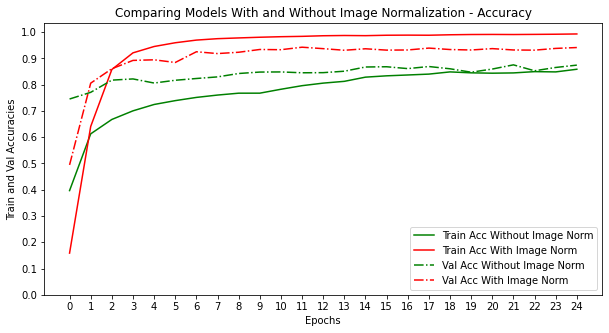

In [27]:
# define area
plt.figure(figsize=(10, 5))

# define x axis
x = final_acc.index
  
# plot lines
plt.plot(x, final_acc['Train Acc Lower'], label = "Train Acc Without Image Norm", color='green')
plt.plot(x, final_acc['Train Acc IN'], label = "Train Acc With Image Norm", color='red')

plt.plot(x, final_acc['Val Acc Lower'], label = "Val Acc Without Image Norm", color='green', linestyle='-.')
plt.plot(x, final_acc['Val Acc IN'], label = "Val Acc With Image Norm", color='red', linestyle='-.')

plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train and Val Accuracies")
plt.title("Comparing Models With and Without Image Normalization - Accuracy")
plt.show()

### Plot loss values

#### Create a df to plot loss values

In [16]:
# Initialize an empty df
final_loss = pd.DataFrame()

In [17]:
# List the columns the df will have
final_loss_columns = ['Train Loss Lower', 'Train Loss IN', 'Val Loss Lower', 'Val Loss IN']

In [18]:
# Create the columns
for column in final_loss_columns:
    final_loss[column] = None

In [19]:
# Confirm they were correctly created
final_loss

,Train Loss Lower,Train Loss IN,Val Loss Lower,Val Loss IN


In [20]:
# Add training accuracy values
final_loss['Train Loss Lower'] = lower['loss']
final_loss['Train Loss IN'] = i_norma['loss']

# Add val accuracy values
final_loss['Val Loss Lower'] = lower['val_loss']
final_loss['Val Loss IN'] = i_norma['val_loss']

In [21]:
final_loss.head(5)

,Train Loss Lower,Train Loss IN,Val Loss Lower,Val Loss IN
0,3.596039,7.264599,2.627808,2.321735
1,27.346151,1.461462,29.248833,0.891036
2,114.021278,0.600379,88.799347,0.665968
3,319.421387,0.348970,239.794388,0.557698
4,629.885010,0.243041,576.906555,0.636678


#### Plot

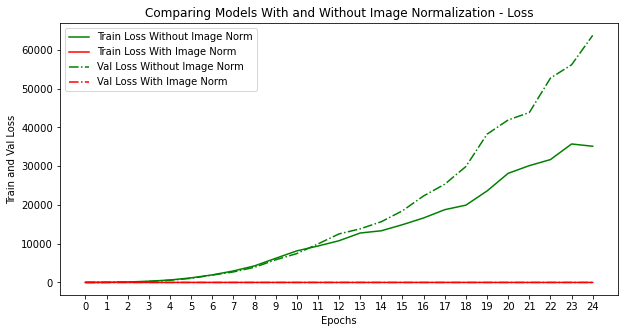

In [23]:
# define area
plt.figure(figsize=(10, 5))

# define x axis
x = final_loss.index
  
# plot lines
plt.plot(x, final_loss['Train Loss Lower'], label = "Train Loss Without Image Norm", color='green')
plt.plot(x, final_loss['Train Loss IN'], label = "Train Loss With Image Norm", color='red')

plt.plot(x, final_loss['Val Loss Lower'], label = "Val Loss Without Image Norm", color='green', linestyle='-.')
plt.plot(x, final_loss['Val Loss IN'], label = "Val Loss With Image Norm", color='red', linestyle='-.')

plt.xticks(np.arange(0, 25, 1))
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train and Val Loss")
plt.title("Comparing Models With and Without Image Normalization - Loss")
plt.show()